<a href="https://colab.research.google.com/github/VICTORIA-OKESIPE/Personal-Projects/blob/main/Nigeria_Loan_Default_Pred/loan_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KaggleX FINAL SHOWCASE PROJECT**

![loan 2.jpg](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Rb7eG5HTSr5aC2-cqa2O0w.png)

### **PROJECT FRAMEWORK**
- Business Understanding


- Exploratory Data Analysis
  * Understanding the Data
  * Relationship Analysis between the variables
  * Cleaning the Data


- Feature Engineering & Modelling
  * Model Training
  * Model Evaluation
  * Shortlisting Promising Models
  * Predictions


- Findings & Recommendations



### **BUSINESS UNDERSTANDING**

### **The Problem**

<p align = "justify"> <br> SuperLender is a digital lending company that uses credit risk models to assess the likelihood of loan repayment by determining the customer's willingness and ability to pay. The company invests in experienced data scientists to build robust models that can accurately predict the odds of repayment. </br>

<br> To make a calculated decision on whether to grant a loan, SuperLender needs to determine the two fundamental drivers of loan default prediction, willingness to pay and ability to pay, at the point of each application. This information helps the company determine the size, price, and tenure of the loan offer. </br>

<br> There are two types of risk models used by SuperLender. The first is a new business risk model that assesses the risk of the first loan application. The second is a repeat or behavior risk model that assesses the risk of repeat loan applications by existing customers based on their prior loan repayment performance. </br>

<br> As a KaggleX Mentee, my job is to help you predict whether a loan will be good (settled on time) or bad (or not) based on a binary outcome variable. In this case, a good loan is denoted as 1 and a bad loan is denoted as 0. </br> </p>

### **The Objective**

Predict if a loan was good (= settled loan on time) or bad (= did not settled loan on time), that is, predict binary outcome variable, where good is 1 and bad is 0.

### **The Datasets**

There are 3 different datasets: Demographic Data, Performance Data, and Previous Loans Data.

### **EXPLORATORY DATA ANALYSIS - UNDERSTANDING THE DATA**

### **Importing Necessary Libraries**

In [ ]:
import pandas as pd     # useful for data manipulation
import numpy as np      # useful for working with arrays
import seaborn as sns   # useful for data visualisation
from sklearn.preprocessing import LabelEncoder  # for data encoding
from xgboost import XGBClassifier # a scikit-learn API compatible class for classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV # a cross-validation technique for finding the optimal parameter values from a given set of parameters in a grid
import matplotlib.pyplot as plt  # useful for data visualisation
import plotly.express as px  # useful for high-level data visualisation

### **Loading Data Dictionary**

[Customer Demographic Data](https://github.com/VICTORIA-OKESIPE/Personal_Projects/blob/main/Nigeria_Loan_Default_Pred/demo_metadata.JPG)


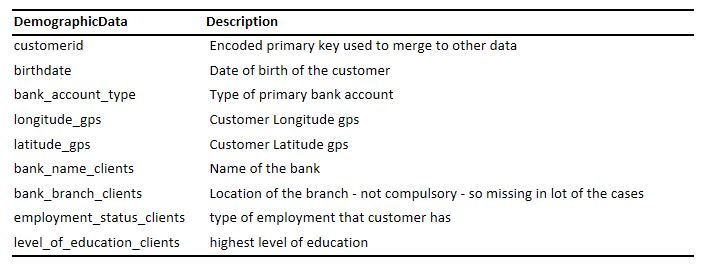

[Customer Performance Data](https://github.com/VICTORIA-OKESIPE/Personal_Projects/blob/main/Nigeria_Loan_Default_Pred/perf_metadata.JPG)
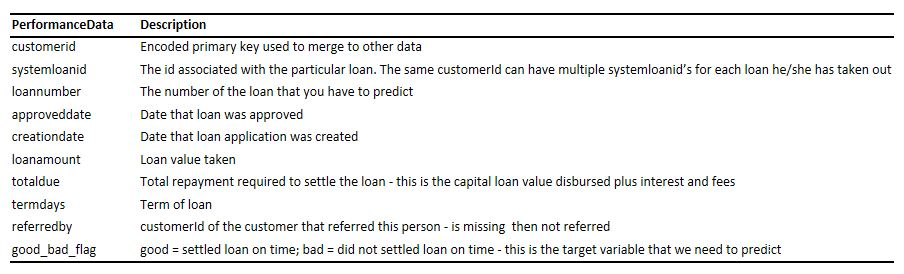

[Customer Previous Loans Data](https://github.com/VICTORIA-OKESIPE/Personal_Projects/blob/main/Nigeria_Loan_Default_Pred/prev_loans_metadata.JPG)
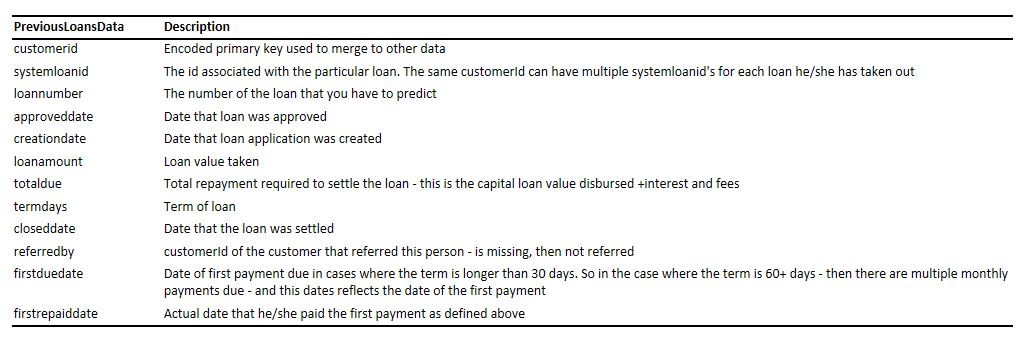

### **Importing Datasets from GitHub**

In [1]:
demo = pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/traindemographics.csv")
perf = pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/trainperf.csv")
prev_loans = pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/trainprevloans.csv")

NameError: ignored

### **Copying Datasets to another dataframe to avoid making changes to the original datasets**

In [ ]:
cust_demo = demo.copy()
cust_perf = perf.copy()
cust_prev_loans = prev_loans.copy()

### **Viewing the Datasets**

In [ ]:
cust_demo.head()      # checking the first five rows of the demographic data

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [ ]:
cust_demo.tail()      # checking the last five rows of the demographic data

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
4341,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,NaN,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary
4345,8a85896653e2e18b0153e69c1b90265c,1975-06-05 00:00:00.000000,Savings,6.661014,7.472700,UBA,NaN,Permanent,NaN


In [ ]:
cust_perf.head()      # checking the first five rows of the data set

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [ ]:
cust_perf.tail()      # checking the last five rows of the data set

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad
4367,8a858fd458639fcc015868eb14b542ad,301967124,8,2017-07-06 21:01:06.000000,2017-07-06 20:01:01.000000,30000.0,34500.0,30,NaN,Bad


In [ ]:
cust_prev_loans.head()      # checking the first five rows of the data set

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [ ]:
#
cust_prev_loans["closeddate"] = cust_prev_loans["closeddate"].apply(lambda x: str(x)[:10])
cust_prev_loans["approveddate"] = cust_prev_loans["approveddate"].apply(lambda x: str(x)[:10])


cust_prev_loans["closeddate"] = pd.to_datetime(cust_prev_loans["closeddate"])
cust_prev_loans["approveddate"] = pd.to_datetime(cust_prev_loans["approveddate"])


cust_prev_loans["customertermdays"] = (cust_prev_loans["closeddate"] - cust_prev_loans["approveddate"])

In [ ]:
cust_prev_loans.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate', 'customertermdays'],
      dtype='object')

In [ ]:
cust_prev_loans[["customertermdays", "termdays"]]

,customertermdays,termdays
0,17 days,30
1,30 days,30
2,52 days,30
3,15 days,15
4,27 days,15
...,...,...
18178,28 days,30
18179,25 days,30
18180,27 days,30
18181,49 days,30


In [ ]:
cust_prev_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customerid       18183 non-null  object        
 1   systemloanid     18183 non-null  int64         
 2   loannumber       18183 non-null  int64         
 3   approveddate     18183 non-null  datetime64[ns]
 4   creationdate     18183 non-null  object        
 5   loanamount       18183 non-null  float64       
 6   totaldue         18183 non-null  float64       
 7   termdays         18183 non-null  int64         
 8   closeddate       18183 non-null  datetime64[ns]
 9   referredby       1026 non-null   object        
 10  firstduedate     18183 non-null  object        
 11  firstrepaiddate  18183 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 1.7+ MB


In [ ]:
cust_prev_loans.isnull().sum()

customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             0
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64

In [ ]:
cust_prev_loans.tail()      # checking the last five rows of the data set

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000
18182,8a858faf5679a838015688de3028143d,301715255,2,2016-09-14 23:42:14.000000,2016-09-14 22:42:05.000000,10000.0,13000.0,30,2016-09-29 19:51:04.000000,NaN,2016-10-14 00:00:00.000000,2016-09-29 19:35:55.000000


### **Getting the Size of the Datasets**

In [ ]:
print("The Customer Demographics Data:", cust_demo.shape)     # getting to know the size of the datasets
print("The Customer Performance Data:", cust_perf.shape)      # getting to know the size of the datasets
print("The Customer Previous Loan Data:", cust_prev_loans.shape)  # getting to know the size of the datasets

The Customer Demographics Data: (4346, 9)
The Customer Performance Data: (4368, 10)
The Customer Previous Loan Data: (18183, 12)


### **Merging the Datasets**

In [ ]:
df = pd.merge(cust_demo, cust_perf, on="customerid")

In [ ]:
dfnew = pd.merge(df, cust_prev_loans, on="customerid")

### **Copying Merged Dataset to another dataframe to avoid making changes to the original merged dataset**

In [ ]:
# copying merged data to avoid manipulating the original data
merged_data = dfnew.copy()

### **Checking the columns of the entire dataset**

In [ ]:
merged_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients',
       'systemloanid_x', 'loannumber_x', 'approveddate_x', 'creationdate_x',
       'loanamount_x', 'totaldue_x', 'termdays_x', 'referredby_x',
       'good_bad_flag', 'systemloanid_y', 'loannumber_y', 'approveddate_y',
       'creationdate_y', 'loanamount_y', 'totaldue_y', 'termdays_y',
       'closeddate', 'referredby_y', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

### **Continue from here**

In [ ]:

merged_data['Year'] = merged_data['birthdate'].apply(lambda x: str(x)[:4])
merged_data['Year']

merged_data.groupby(['Year'])['Year'].count()

#merged_data.pivot_table(columns=['birthdate'],aggfunc='size').plot(kind='bar', figsize = (20, 10))

# getting an age column
age = []
for i in merged_data["Year"]:
  age.append(2017-int(i))
merged_data["age"]=age

In [ ]:
merged_data.isnull().sum()

customerid                        0
birthdate                         0
bank_account_type                 0
longitude_gps                     0
latitude_gps                      0
bank_name_clients                 0
bank_branch_clients           13589
employment_status_clients      1363
level_of_education_clients    10229
systemloanid_x                    0
loannumber_x                      0
approveddate_x                    0
creationdate_x                    0
loanamount_x                      0
totaldue_x                        0
termdays_x                        0
referredby_x                  12891
good_bad_flag                     0
systemloanid_y                    0
loannumber_y                      0
approveddate_y                    0
creationdate_y                    0
loanamount_y                      0
totaldue_y                        0
termdays_y                        0
closeddate                        0
referredby_y                  12891
firstduedate                

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  13693 non-null  object 
 1   birthdate                   13693 non-null  object 
 2   bank_account_type           13693 non-null  object 
 3   longitude_gps               13693 non-null  float64
 4   latitude_gps                13693 non-null  float64
 5   bank_name_clients           13693 non-null  object 
 6   bank_branch_clients         104 non-null    object 
 7   employment_status_clients   12330 non-null  object 
 8   level_of_education_clients  3464 non-null   object 
 9   systemloanid_x              13693 non-null  int64  
 10  loannumber_x                13693 non-null  int64  
 11  approveddate_x              13693 non-null  object 
 12  creationdate_x              13693 non-null  object 
 13  loanamount_x                136

In [ ]:
merged_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid_x,...,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,referredby_y,firstduedate,firstrepaiddate,Year,age
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,301964962,...,2017-06-19 16:54:19.000000,10000.0,11500.0,15,2017-07-04 18:09:47.000000,8a858899538ddb8e0153a780c56e34bb,2017-07-05 00:00:00.000000,2017-07-04 17:59:36.000000,1973,44
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,301972172,...,2017-06-07 11:46:22.000000,10000.0,13000.0,30,2017-07-10 08:52:54.000000,NaN,2017-07-07 00:00:00.000000,2017-07-10 08:42:44.000000,1986,31
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,...,2017-06-08 10:49:27.000000,10000.0,13000.0,30,2017-07-11 10:12:20.000000,NaN,2017-07-10 00:00:00.000000,2017-07-11 10:02:11.000000,1987,30
3,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,...,2017-05-08 10:06:40.000000,10000.0,11500.0,15,2017-05-27 13:02:53.000000,NaN,2017-05-23 00:00:00.000000,2017-05-27 12:52:45.000000,1987,30
4,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,...,2017-05-27 16:10:34.000000,10000.0,11500.0,15,2017-06-08 11:13:50.000000,NaN,2017-06-12 00:00:00.000000,2017-06-08 11:03:40.000000,1987,30


In [ ]:
# Change date column to its appriopriate datatype

date_cols = [i for i in merged_data.columns if 'date' in i]
date_cols

for i in date_cols:
  merged_data[i] = pd.to_datetime(merged_data[i])

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  13693 non-null  object        
 1   birthdate                   13693 non-null  datetime64[ns]
 2   bank_account_type           13693 non-null  object        
 3   longitude_gps               13693 non-null  float64       
 4   latitude_gps                13693 non-null  float64       
 5   bank_name_clients           13693 non-null  object        
 6   bank_branch_clients         104 non-null    object        
 7   employment_status_clients   12330 non-null  object        
 8   level_of_education_clients  3464 non-null   object        
 9   systemloanid_x              13693 non-null  int64         
 10  loannumber_x                13693 non-null  int64         
 11  approveddate_x              13693 non-null  datetime64

In [ ]:
merged_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid_x,...,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,referredby_y,firstduedate,firstrepaiddate,Year,age
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,301964962,...,2017-06-19 16:54:19,10000.0,11500.0,15,2017-07-04 18:09:47,8a858899538ddb8e0153a780c56e34bb,2017-07-05,2017-07-04 17:59:36,1973,44
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,301972172,...,2017-06-07 11:46:22,10000.0,13000.0,30,2017-07-10 08:52:54,NaN,2017-07-07,2017-07-10 08:42:44,1986,31
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,...,2017-06-08 10:49:27,10000.0,13000.0,30,2017-07-11 10:12:20,NaN,2017-07-10,2017-07-11 10:02:11,1987,30
3,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,...,2017-05-08 10:06:40,10000.0,11500.0,15,2017-05-27 13:02:53,NaN,2017-05-23,2017-05-27 12:52:45,1987,30
4,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,...,2017-05-27 16:10:34,10000.0,11500.0,15,2017-06-08 11:13:50,NaN,2017-06-12,2017-06-08 11:03:40,1987,30


In [ ]:
cat_cols = merged_data.select_dtypes("object")
cat_cols.columns

for i in cat_cols.columns:
  merged_data[i] = merged_data[i].astype("category")

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  13693 non-null  category      
 1   birthdate                   13693 non-null  datetime64[ns]
 2   bank_account_type           13693 non-null  category      
 3   longitude_gps               13693 non-null  float64       
 4   latitude_gps                13693 non-null  float64       
 5   bank_name_clients           13693 non-null  category      
 6   bank_branch_clients         104 non-null    category      
 7   employment_status_clients   12330 non-null  category      
 8   level_of_education_clients  3464 non-null   category      
 9   systemloanid_x              13693 non-null  int64         
 10  loannumber_x                13693 non-null  int64         
 11  approveddate_x              13693 non-null  datetime64

In [ ]:
merged_data["level_of_education_clients"].unique()

[NaN, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary']
Categories (4, object): ['Graduate', 'Post-Graduate', 'Primary', 'Secondary']

### **Encoding Categorical Data**

In [ ]:
# label_encoder object
label_encoder =LabelEncoder()

# getting categorical variables
catt_cols = merged_data.select_dtypes("category")

# Encode labels in column. 

for i in catt_cols:
  merged_data[i]= label_encoder.fit_transform(merged_data[i])

<AxesSubplot:>

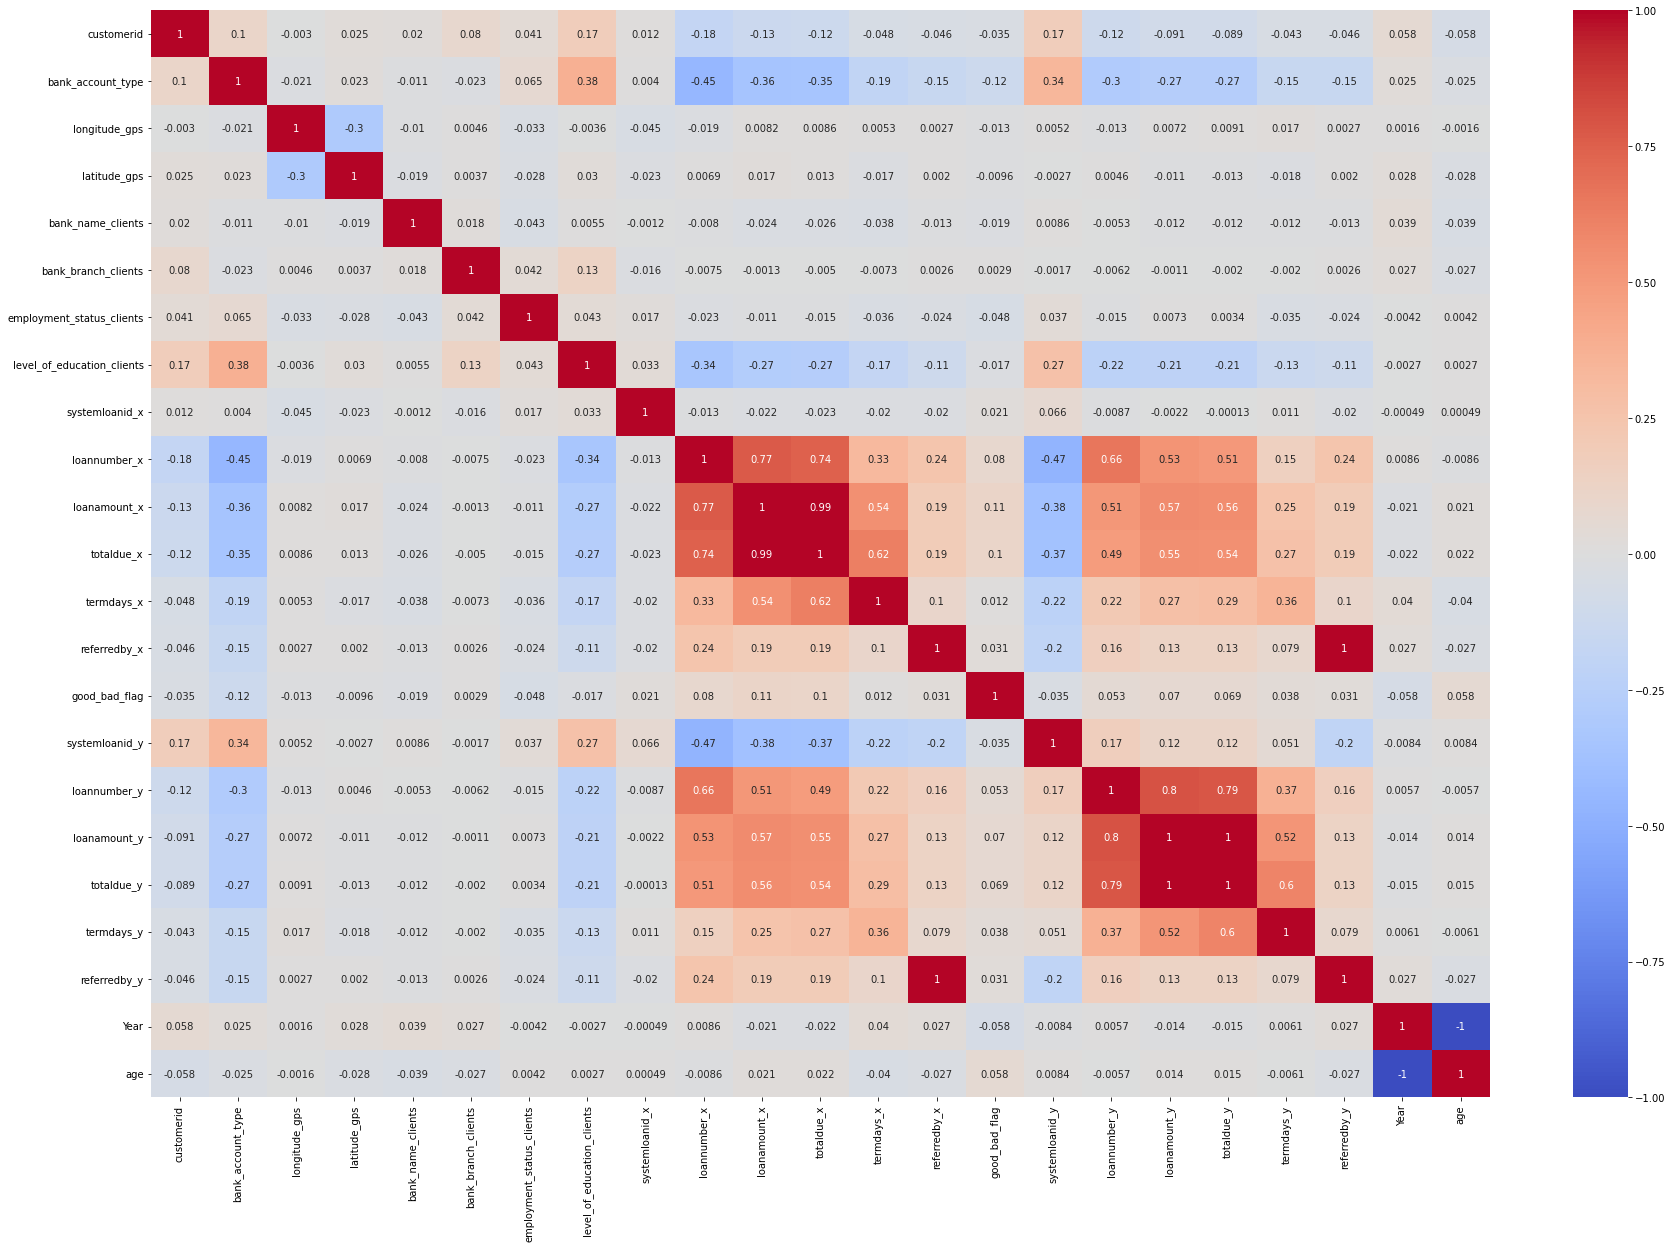

In [ ]:
f, ax = plt.subplots(figsize=(30,20))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')

In [ ]:
merged_data.drop(["customerid","birthdate","systemloanid_x","systemloanid_y"], axis=1, inplace=True)

merged_data.drop(["customerid","birthdate","systemloanid_x","systemloanid_y

In [ ]:
merged_data.isnull().sum()

bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
bank_branch_clients           0
employment_status_clients     0
level_of_education_clients    0
loannumber_x                  0
approveddate_x                0
creationdate_x                0
loanamount_x                  0
totaldue_x                    0
termdays_x                    0
referredby_x                  0
good_bad_flag                 0
loannumber_y                  0
approveddate_y                0
creationdate_y                0
loanamount_y                  0
totaldue_y                    0
termdays_y                    0
closeddate                    0
referredby_y                  0
firstduedate                  0
firstrepaiddate               0
Year                          0
age                           0
dtype: int64

In [ ]:
merged_data.head()

,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid_x,loannumber_x,...,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,referredby_y,firstduedate,firstrepaiddate
0,1973-10-10,2,3.319219,6.528604,6,28,6,4,301964962,2,...,1,2017-06-19 17:55:26,2017-06-19 16:54:19,10000.0,11500.0,15,2017-07-04 18:09:47,8,2017-07-05,2017-07-04 17:59:36
1,1986-01-21,2,3.325598,7.119403,12,28,1,4,301972172,2,...,1,2017-06-07 12:47:30,2017-06-07 11:46:22,10000.0,13000.0,30,2017-07-10 08:52:54,407,2017-07-07,2017-07-10 08:42:44
2,1987-04-01,2,5.746100,5.563174,4,28,6,4,301976271,4,...,3,2017-06-08 11:49:34,2017-06-08 10:49:27,10000.0,13000.0,30,2017-07-11 10:12:20,407,2017-07-10,2017-07-11 10:02:11
3,1987-04-01,2,5.746100,5.563174,4,28,6,4,301976271,4,...,1,2017-05-08 11:07:01,2017-05-08 10:06:40,10000.0,11500.0,15,2017-05-27 13:02:53,407,2017-05-23,2017-05-27 12:52:45
4,1987-04-01,2,5.746100,5.563174,4,28,6,4,301976271,4,...,2,2017-05-27 17:10:41,2017-05-27 16:10:34,10000.0,11500.0,15,2017-06-08 11:13:50,407,2017-06-12,2017-06-08 11:03:40


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   birthdate                   13693 non-null  datetime64[ns]
 1   bank_account_type           13693 non-null  int64         
 2   longitude_gps               13693 non-null  float64       
 3   latitude_gps                13693 non-null  float64       
 4   bank_name_clients           13693 non-null  int64         
 5   bank_branch_clients         13693 non-null  int64         
 6   employment_status_clients   13693 non-null  int64         
 7   level_of_education_clients  13693 non-null  int64         
 8   systemloanid_x              13693 non-null  int64         
 9   loannumber_x                13693 non-null  int64         
 10  approveddate_x              13693 non-null  datetime64[ns]
 11  creationdate_x              13693 non-null  datetime64

In [ ]:
merged_data["bank_account_type"].unique()

array([2, 1, 0])

In [ ]:
cust_demo["bank_account_type"].unique()

array(['Savings', 'Other', 'Current'], dtype=object)

## Deductions

- The memory usage has now reduced from 1.7+ MB to 426.5 KB

In [ ]:
merged_data.head()

,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid_x,loannumber_x,...,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,referredby_y,firstduedate,firstrepaiddate
0,1973-10-10,2,3.319219,6.528604,6,28,6,4,301964962,2,...,1,2017-06-19 17:55:26,2017-06-19 16:54:19,10000.0,11500.0,15,2017-07-04 18:09:47,8,2017-07-05,2017-07-04 17:59:36
1,1986-01-21,2,3.325598,7.119403,12,28,1,4,301972172,2,...,1,2017-06-07 12:47:30,2017-06-07 11:46:22,10000.0,13000.0,30,2017-07-10 08:52:54,407,2017-07-07,2017-07-10 08:42:44
2,1987-04-01,2,5.746100,5.563174,4,28,6,4,301976271,4,...,3,2017-06-08 11:49:34,2017-06-08 10:49:27,10000.0,13000.0,30,2017-07-11 10:12:20,407,2017-07-10,2017-07-11 10:02:11
3,1987-04-01,2,5.746100,5.563174,4,28,6,4,301976271,4,...,1,2017-05-08 11:07:01,2017-05-08 10:06:40,10000.0,11500.0,15,2017-05-27 13:02:53,407,2017-05-23,2017-05-27 12:52:45
4,1987-04-01,2,5.746100,5.563174,4,28,6,4,301976271,4,...,2,2017-05-27 17:10:41,2017-05-27 16:10:34,10000.0,11500.0,15,2017-06-08 11:13:50,407,2017-06-12,2017-06-08 11:03:40


## Deductions

- There are 3 categorical variables in the Demographic Data with missing values.
- There is only 1 categorical variables in the Performance Data with missing values.
- There is only 1 categorical variable in the Previous Loans Data with missing values.
- The data types recognized as "object" can be converted to "categories".

## Summarising the Datasets

In [ ]:
merged_data.describe().T      # summarising the numerical variables in the datasets

,count,mean,std,min,25%,50%,75%,max
bank_account_type,13693.0,1.595706e+00,0.513179,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
longitude_gps,13693.0,4.482207e+00,8.639590,-1.182470e+02,3.354793e+00,3.576022e+00,6.364658e+00,1.512093e+02
latitude_gps,13693.0,7.291442e+00,3.436232,-3.386882e+01,6.471885e+00,6.617633e+00,7.421333e+00,7.122807e+01
bank_name_clients,13693.0,6.420945e+00,4.540078,0.000000e+00,5.000000e+00,6.000000e+00,6.000000e+00,1.700000e+01
bank_branch_clients,13693.0,2.787446e+01,1.581767,0.000000e+00,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01
employment_status_clients,13693.0,2.036515e+00,1.659737,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,6.000000e+00
level_of_education_clients,13693.0,3.131381e+00,1.583692,0.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
systemloanid_x,13693.0,3.019801e+08,13435.313603,3.019585e+08,3.019678e+08,3.019787e+08,3.019929e+08,3.020040e+08
loannumber_x,13693.0,8.401081e+00,4.318780,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01,2.700000e+01
loanamount_x,13693.0,2.568867e+04,12625.374212,1.000000e+04,1.000000e+04,3.000000e+04,4.000000e+04,6.000000e+04


In [ ]:
merged_data.shape

(13693, 28)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   birthdate                   13693 non-null  datetime64[ns]
 1   bank_account_type           13693 non-null  int64         
 2   longitude_gps               13693 non-null  float64       
 3   latitude_gps                13693 non-null  float64       
 4   bank_name_clients           13693 non-null  int64         
 5   bank_branch_clients         13693 non-null  int64         
 6   employment_status_clients   13693 non-null  int64         
 7   level_of_education_clients  13693 non-null  int64         
 8   systemloanid_x              13693 non-null  int64         
 9   loannumber_x                13693 non-null  int64         
 10  approveddate_x              13693 non-null  datetime64[ns]
 11  creationdate_x              13693 non-null  datetime64

## Deductions

- There are no missing values in the columns "longitude_gps" and "latitude_gps".
- The least new loan applicants can borrow is ₦$10,000$, while in the past minimum loan was ₦$3,000$. Meanwhile, regardless of whether new or returning loan applicant, maximum loan amount is ₦$60,000$.
- The customers have a maximum of 90 days to repay the loan. While the minimum number of days for repayment is 15 days.


## **Relationship Analysis between the Variables**

In [ ]:
merged_data.corr()

,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid_x,loannumber_x,loanamount_x,totaldue_x,termdays_x,referredby_x,good_bad_flag,systemloanid_y,loannumber_y,loanamount_y,totaldue_y,termdays_y,referredby_y
bank_account_type,1.000000,-0.020633,0.022526,-0.011274,-0.022762,0.065438,0.379801,0.003971,-0.448816,-0.359226,-0.348307,-0.191079,-0.151258,-0.117763,0.337789,-0.296195,-0.268675,-0.266813,-0.153422,-0.151258
longitude_gps,-0.020633,1.000000,-0.300672,-0.010468,0.004620,-0.033013,-0.003586,-0.044741,-0.018992,0.008233,0.008558,0.005345,0.002738,-0.013174,0.005168,-0.012506,0.007249,0.009109,0.016654,0.002738
latitude_gps,0.022526,-0.300672,1.000000,-0.018576,0.003728,-0.027884,0.029832,-0.023096,0.006872,0.016843,0.012612,-0.017252,0.001961,-0.009620,-0.002673,0.004575,-0.011296,-0.013351,-0.017500,0.001961
bank_name_clients,-0.011274,-0.010468,-0.018576,1.000000,0.018282,-0.042622,0.005503,-0.001157,-0.008023,-0.024463,-0.025613,-0.037575,-0.012651,-0.019232,0.008583,-0.005344,-0.011565,-0.011997,-0.011917,-0.012651
bank_branch_clients,-0.022762,0.004620,0.003728,0.018282,1.000000,0.041556,0.132507,-0.015704,-0.007500,-0.001321,-0.004997,-0.007310,0.002608,0.002932,-0.001712,-0.006198,-0.001120,-0.001959,-0.001974,0.002608
employment_status_clients,0.065438,-0.033013,-0.027884,-0.042622,0.041556,1.000000,0.043438,0.017285,-0.023349,-0.010924,-0.014584,-0.036101,-0.024404,-0.048051,0.036790,-0.015442,0.007293,0.003389,-0.035255,-0.024404
level_of_education_clients,0.379801,-0.003586,0.029832,0.005503,0.132507,0.043438,1.000000,0.032523,-0.335998,-0.274901,-0.271637,-0.172015,-0.111972,-0.017456,0.266081,-0.222213,-0.213761,-0.213803,-0.134184,-0.111972
systemloanid_x,0.003971,-0.044741,-0.023096,-0.001157,-0.015704,0.017285,0.032523,1.000000,-0.013088,-0.021906,-0.023183,-0.019715,-0.020463,0.021008,0.066067,-0.008691,-0.002173,-0.000133,0.010859,-0.020463
loannumber_x,-0.448816,-0.018992,0.006872,-0.008023,-0.007500,-0.023349,-0.335998,-0.013088,1.000000,0.773284,0.744855,0.325505,0.243172,0.080411,-0.471376,0.659946,0.526889,0.506839,0.151975,0.243172
loanamount_x,-0.359226,0.008233,0.016843,-0.024463,-0.001321,-0.010924,-0.274901,-0.021906,0.773284,1.000000,0.992614,0.544543,0.192609,0.113026,-0.376012,0.510295,0.566468,0.556789,0.250101,0.192609


In [ ]:
merged_data['birthdate'].head(10)
merged_data['birthdate'].tail(10)

13683   1983-06-07
13684   1983-06-07
13685   1983-06-07
13686   1985-12-13
13687   1985-12-13
13688   1985-12-13
13689   1985-12-13
13690   1985-12-13
13691   1985-12-13
13692   1982-07-01
Name: birthdate, dtype: datetime64[ns]

In [ ]:
merged_data['approveddate_x'].head()

0   2017-07-05 14:29:48
1   2017-07-10 21:21:46
2   2017-07-13 15:40:27
3   2017-07-13 15:40:27
4   2017-07-13 15:40:27
Name: approveddate_x, dtype: datetime64[ns]

In [ ]:
merged_data.groupby(['bank_name_clients'])['bank_name_clients'].count()

bank_name_clients
0     1270
1      983
2      450
3      420
4      267
5     1932
6     5034
7       87
8       83
9      272
10     489
11      44
12     112
13    1126
14      74
15      14
16      88
17     948
Name: bank_name_clients, dtype: int64

<AxesSubplot:xlabel='bank_name_clients'>

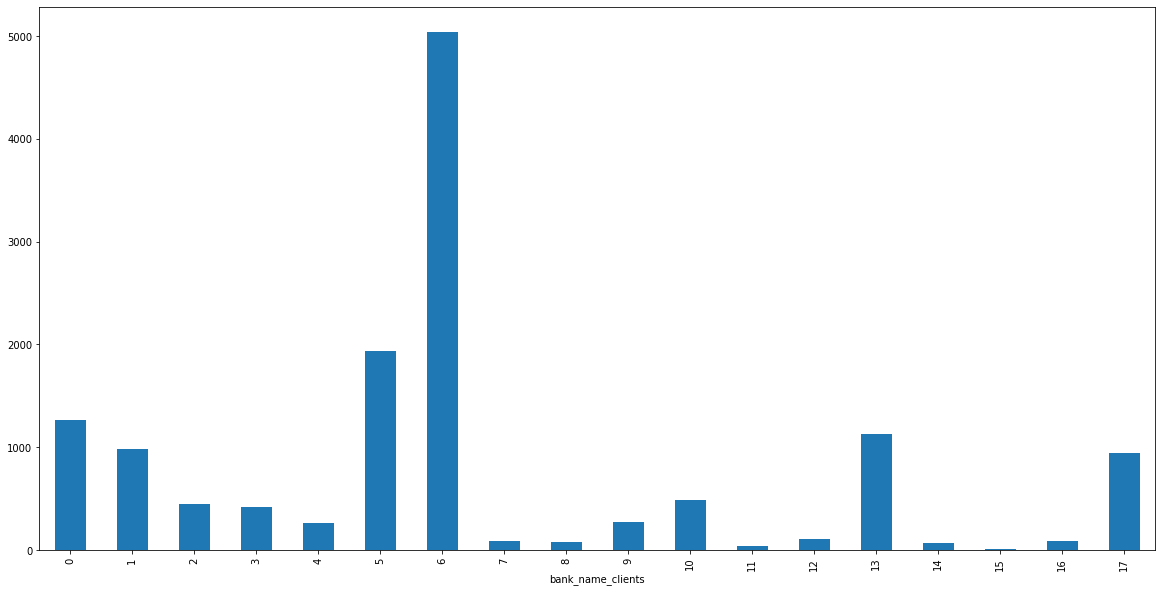

In [ ]:
merged_data.pivot_table(columns=['bank_name_clients'],aggfunc='size').plot(kind='bar', figsize = (20, 10))

<AxesSubplot:xlabel='bank_name_clients'>

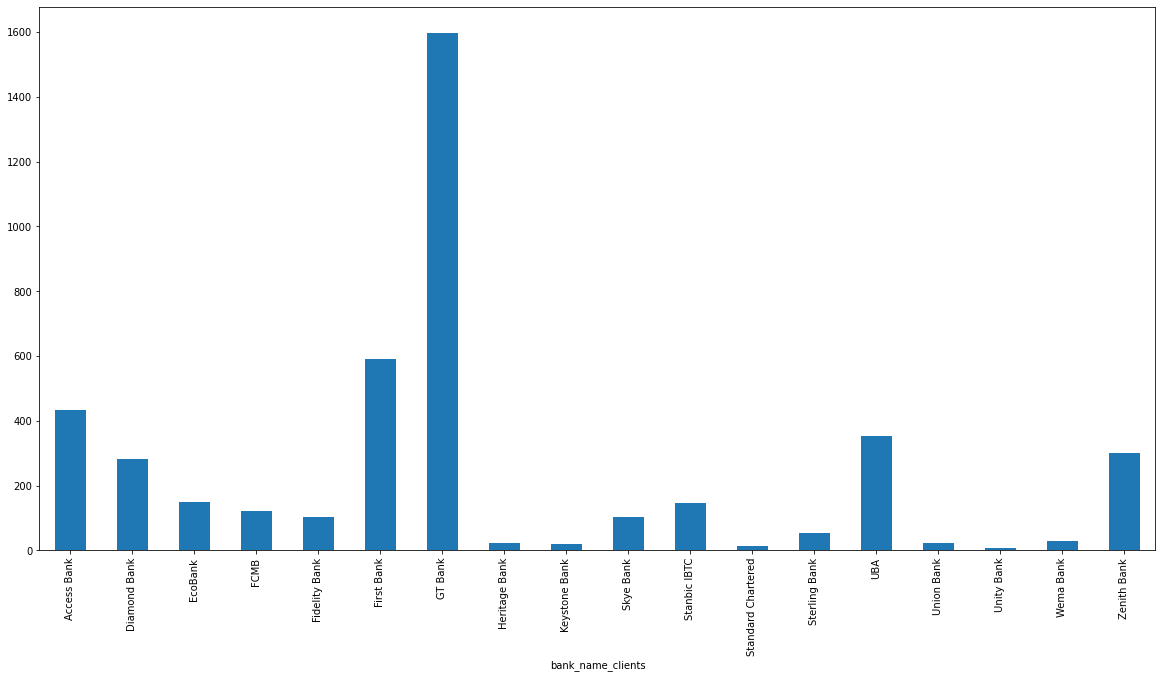

In [ ]:
cust_demo.pivot_table(columns=['bank_name_clients'],aggfunc='size').plot(kind='bar', figsize = (20, 10))

In [ ]:
merged_data.groupby(['employment_status_clients'])['employment_status_clients'].count()

employment_status_clients
0      10
1    9138
2      29
3    2319
4     615
5     219
6    1363
Name: employment_status_clients, dtype: int64

<AxesSubplot:xlabel='employment_status_clients'>

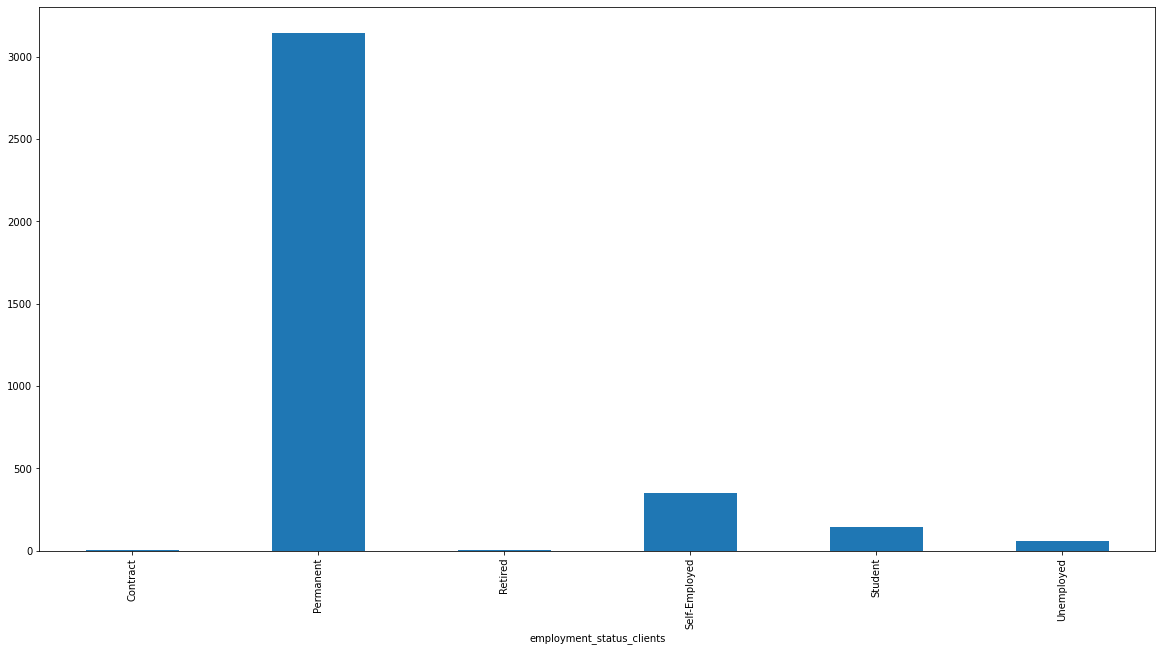

In [ ]:
cust_demo.pivot_table(columns=['employment_status_clients'],aggfunc='size').plot(kind='bar', figsize = (20, 10))

In [ ]:
cust_demo.groupby(['level_of_education_clients'])['level_of_education_clients'].count()

level_of_education_clients
Graduate         420
Post-Graduate     68
Primary           10
Secondary         89
Name: level_of_education_clients, dtype: int64

<AxesSubplot:ylabel='None'>

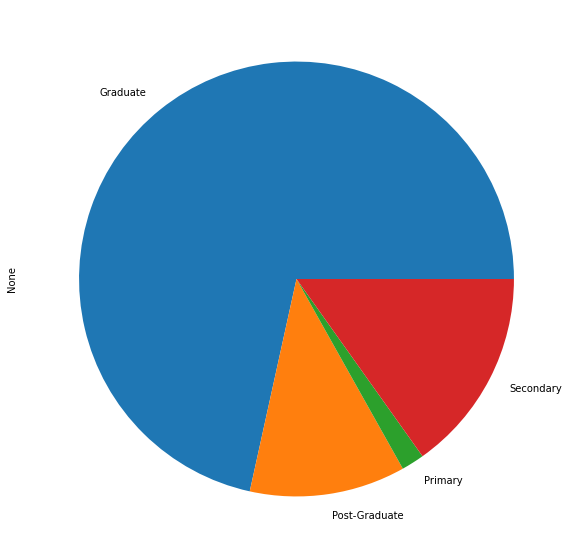

In [ ]:
cust_demo.pivot_table(columns=['level_of_education_clients'],aggfunc='size').plot(kind='pie', figsize = (20, 10))

In [ ]:
fig = px.scatter_geo(cust_demo, lat='latitude_gps', lon='longitude_gps', hover_name="bank_name_clients")
fig.show()

<AxesSubplot:xlabel='latitude_gps', ylabel='longitude_gps'>

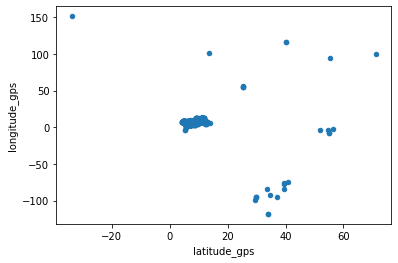

In [ ]:
cust_demo.plot(x="latitude_gps", y="longitude_gps", kind="scatter")

# **PREPROCESSING THE DATA**

## **Cleaning the Data**

In [ ]:
merged_data.columns

Index(['birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid_x', 'loannumber_x',
       'approveddate_x', 'creationdate_x', 'loanamount_x', 'totaldue_x',
       'termdays_x', 'referredby_x', 'good_bad_flag', 'systemloanid_y',
       'loannumber_y', 'approveddate_y', 'creationdate_y', 'loanamount_y',
       'totaldue_y', 'termdays_y', 'closeddate', 'referredby_y',
       'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [ ]:
merged_data.dtypes

birthdate                     datetime64[ns]
bank_account_type                      int64
longitude_gps                        float64
latitude_gps                         float64
bank_name_clients                      int64
bank_branch_clients                    int64
employment_status_clients              int64
level_of_education_clients             int64
systemloanid_x                         int64
loannumber_x                           int64
approveddate_x                datetime64[ns]
creationdate_x                datetime64[ns]
loanamount_x                         float64
totaldue_x                           float64
termdays_x                             int64
referredby_x                           int64
good_bad_flag                          int64
systemloanid_y                         int64
loannumber_y                           int64
approveddate_y                datetime64[ns]
creationdate_y                datetime64[ns]
loanamount_y                         float64
totaldue_y

### **Handling Missing Data**

In [ ]:
# counting missing data
merged_data.isna().sum()

birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
bank_branch_clients           0
employment_status_clients     0
level_of_education_clients    0
systemloanid_x                0
loannumber_x                  0
approveddate_x                0
creationdate_x                0
loanamount_x                  0
totaldue_x                    0
termdays_x                    0
referredby_x                  0
good_bad_flag                 0
systemloanid_y                0
loannumber_y                  0
approveddate_y                0
creationdate_y                0
loanamount_y                  0
totaldue_y                    0
termdays_y                    0
closeddate                    0
referredby_y                  0
firstduedate                  0
firstrepaiddate               0
dtype: int64

In [ ]:
merged_data.drop(['bank_branch_clients','referredby_x','referredby_y'], axis=1, inplace=True)

In [ ]:
merged_data.columns

Index(['birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid_x', 'loannumber_x',
       'approveddate_x', 'creationdate_x', 'loanamount_x', 'totaldue_x',
       'termdays_x', 'good_bad_flag', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'closeddate', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [ ]:
merged_data.shape

(13693, 25)

In [ ]:
# copying the data
merged_data_2 = merged_data.copy()

In [ ]:
merged_data_2.columns

Index(['birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid_x', 'loannumber_x',
       'approveddate_x', 'creationdate_x', 'loanamount_x', 'totaldue_x',
       'termdays_x', 'good_bad_flag', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'closeddate', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

### **Machine Learning**

In [ ]:
datte_cols = merged_data_2.select_dtypes("datetime64[ns]")
datte_cols.columns

for i in datte_cols.columns:
  merged_data_2[i] = merged_data_2[i].astype("int")

merged_data_2.info()

<ipython-input-114-a3bcc3a89ec6>:5: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   birthdate                   13693 non-null  int64  
 1   bank_account_type           13693 non-null  int64  
 2   longitude_gps               13693 non-null  float64
 3   latitude_gps                13693 non-null  float64
 4   bank_name_clients           13693 non-null  int64  
 5   employment_status_clients   13693 non-null  int64  
 6   level_of_education_clients  13693 non-null  int64  
 7   systemloanid_x              13693 non-null  int64  
 8   loannumber_x                13693 non-null  int64  
 9   approveddate_x              13693 non-null  int64  
 10  creationdate_x              13693 non-null  int64  
 11  loanamount_x                13693 non-null  float64
 12  totaldue_x                  13693 non-null  float64
 13  termdays_x                  136

In [ ]:
from xgboost import XGBClassifier # a scikit-learn API compatible class for classification

In [ ]:
merged_data_2.columns

Index(['birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid_x', 'loannumber_x',
       'approveddate_x', 'creationdate_x', 'loanamount_x', 'totaldue_x',
       'termdays_x', 'good_bad_flag', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'closeddate', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [ ]:
# Split Features and Target Varible 
X = merged_data_2.drop(['good_bad_flag'], axis=1)
y = merged_data_2['good_bad_flag']

# Splitting into Train-Test Data 
from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

## Traing Data with Two Separate Datasets

- Training Data for Model Fitting
- Validation Data for Loss Monitoring and Early Stopping

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

In [ ]:
xgb = XGBClassifier()
parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [500]}

In [ ]:
xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=0)

In [ ]:
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.5, 1.0],
                         'learning_rate': [0.0001, 0.001, 0.01],
                         'max_depth': [3, 5, 7], 'min_child_weight': [3, 5, 7],
                         'n_estimators': [500],
                         'objective': ['binary:logistic'],
                         'subsample': [0.1, 0.5, 1.0]})

In [ ]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [ ]:
xgb_cv = (xgb_grid.best_estimator_)

In [ ]:
eval_set = [(X_train, y_train),
            (X_val, y_val)]

In [ ]:
fit_model = xgb_cv.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    eval_metric='logloss',
    early_stopping_rounds=50,
    verbose=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [ ]:
print("ACC_SCORE:", accuracy_score(y_val, fit_model.predict(X_val)))
print("F1_SCORE:", f1_score(y_val, fit_model.predict(X_val)))

In [ ]:
print("ACC_SCORE:", accuracy_score(y_test, fit_model.predict(X_test)))
print("F1_SCORE:", f1_score(y_test, fit_model.predict(X_test)))

In [ ]:
fit_model.save_model('xgb_model.json')

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(y_test, fit_model.predict(X_test), alpha=0.3)
plt.show()

NameError: ignored

In [ ]:
# feature evaluation

feat_importances = pd.Series(fit_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

### Prediction with the test data

In [ ]:
def automated_pipeline(dfr1,dfr2,dfr3,model):
# Merging Dataset
  merged_test_data=pd.merge(dfr1, dfr2, on='customerid')
  final_test_merged_data=pd.merge(merged_test_data, dfr3, on='customerid')

# Change date column to its appriopriate datatype
  date_cols = [i for i in final_test_merged_data.columns if 'date' in i]
  date_cols

  for i in date_cols:
    final_test_merged_data[i] = pd.to_datetime(final_test_merged_data[i])

  final_test_merged_data.info()

# Converting the variables to the appropriate data types
  cat_cols = final_test_merged_data.select_dtypes("object")
  cat_cols.columns

  for i in cat_cols.columns:
    final_test_merged_data[i] = final_test_merged_data[i].astype("category")

# Dropping unwanted variables
  final_test_merged_data.drop(["customerid", "bank_branch_clients", "referredby_x","referredby_y"], axis=1, inplace=True)

  datte_cols = merged_data_2.select_dtypes("datetime64[ns]")
  datte_cols.columns

  for i in datte_cols.columns:
    merged_data_2[i] = merged_data_2[i].astype("int")

  merged_data_2.info()

  # # Dealing with missing data
  # final_test_merged_data.drop(['bank_branch_clients','referredby_x','referredby_y'], axis=1, inplace=True)
  # final_test_merged_data['employment_status_clients'].fillna(final_merged_data['employment_status_clients'].mode()[0], inplace=True)
  # final_test_merged_data['level_of_education_clients'].fillna('Graduate', inplace=True)
  # print(" The number of null datapoint are :", final_test_merged_data.isna().sum() )

  # label_encoder object
  label_encoder =LabelEncoder()

# getting categorical variables
  catt_cols = final_test_merged_data.select_dtypes("category")

# Encode labels in column. 

for i in catt_cols:
  final_test_merged_data[i]= label_encoder.fit_transform(final_test_merged_data[i])


  #Predicting Using ML 
  y_pred = fit_model.predict(final_test_merged_data)
  print(y_pred)
  merged_test_data["Good_Bad_flag"]=y_pred
  results = merged_test_data[["customerid", "Good_Bad_flag"]]
  results.to_csv("Submission.csv", index=False)
  print(results.head(5))


In [ ]:
test_demo=pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/testdemographics.csv")
test_perf=pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/testperf.csv")
test_prev_loans=pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/testprevloans.csv")

auto_pipeline(test_demo,test_perf,test_prev_loans,fit_model)

# Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(logisticRegr,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(logisticRegr,X_train,y_train,cv=5,scoring='accuracy').mean())

print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.8152610441767069
Training Data F1 Score  0.8982300884955753
Validation Mean F1 Score:  0.44916020888826613
Validation Mean Accuracy:  0.815409906445838
Test Accuracy:  0.8152610441767069
Test F1 Score:  0.8982300884955753
Confusion Matrix on Test Data


Predicted,1,All
Actual,,
0,506,506
1,2233,2233
All,2739,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       506
           1       0.82      1.00      0.90      2233

    accuracy                           0.82      2739
   macro avg       0.41      0.50      0.45      2739
weighted avg       0.66      0.82      0.73      2739



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Decision Tree

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.9594742606790799
Training Data F1 Score  0.9751288371050862
Validation Mean F1 Score:  0.9130047305754747
Validation Mean Accuracy:  0.9479638787984885
Test Accuracy:  0.9594742606790799
Test F1 Score:  0.9751288371050862
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,452,54,506
1,57,2176,2233
All,509,2230,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       506
           1       0.98      0.97      0.98      2233

    accuracy                           0.96      2739
   macro avg       0.93      0.93      0.93      2739
weighted avg       0.96      0.96      0.96      2739



# Random Forests

In [ ]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))


print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())


print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.9623950346841913
Training Data F1 Score  0.9773177714159876
Validation Mean F1 Score:  0.9139629936392654
Validation Mean Accuracy:  0.9493330332264203
Test Accuracy:  0.9623950346841913
Test F1 Score:  0.9773177714159876
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,417,89,506
1,14,2219,2233
All,431,2308,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       506
           1       0.96      0.99      0.98      2233

    accuracy                           0.96      2739
   macro avg       0.96      0.91      0.93      2739
weighted avg       0.96      0.96      0.96      2739



# Artificial Neural Networks

In [ ]:
Ann_clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1)
Ann_clf.fit(X_train, y_train)
y_pred = Ann_clf.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.6871120847024461
Training Data F1 Score  0.8056248582444998
Validation Mean F1 Score:  0.9125681890854824
Validation Mean Accuracy:  0.9463205433602389
Test Accuracy:  0.6871120847024461
Test F1 Score:  0.8056248582444998
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,106,400,506
1,457,1776,2233
All,563,2176,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.21      0.20       506
           1       0.82      0.80      0.81      2233

    accuracy                           0.69      2739
   macro avg       0.50      0.50      0.50      2739
weighted avg       0.70      0.69      0.69      2739



# Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.69258853596203
Training Data F1 Score  0.8029026217228464
Validation Mean F1 Score:  0.9143689561461423
Validation Mean Accuracy:  0.9482376013121341
Test Accuracy:  0.69258853596203
Test F1 Score:  0.8029026217228464
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,182,324,506
1,518,1715,2233
All,700,2039,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.36      0.30       506
           1       0.84      0.77      0.80      2233

    accuracy                           0.69      2739
   macro avg       0.55      0.56      0.55      2739
weighted avg       0.73      0.69      0.71      2739



### **Saving the promising model**

### Trying out XGBoost Classifier.



In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Print model accuracy
print("Accuracy: ", round(xgb_model.score(X_test, y_test), 4))


Accuracy:  0.9617


In [ ]:
xgb_model.save_model("loan_model.json")